In [40]:
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns

In [41]:
ea_data = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\filtered_ea_clean.csv")
# dfts = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\Descriptors\dft_descriptors_cclib_final_2.csv")
# dfts = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\fg\fluorinated_data.csv")
ea_data.dropna(inplace=True)
ea_data.rename(columns={'solvent ID': 'solvent_ID', 'EA_0-1': 'EA_values'}, inplace=True)
# dfts.rename(columns={'solvent ID': 'solvent_ID', 'EA_0-1': 'EA_values'}, inplace=True)
# dfts.rename(columns={'solvent_id': 'solvent_ID'}, inplace=True)
# dfts.rename(columns={'solvent ID': 'solvent_ID'}, inplace=True)

In [42]:
ea_data.head()
# dfts.head()

,solvent_ID,smiles,EA_values
0,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O,-5.118749
1,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1,-4.129380
2,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F,-4.700916
3,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1,-4.305889
4,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C,-5.431978


In [43]:
df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_merged.csv")
# df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered_ea.csv")
# df = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\df_filtered_ea_rd_dft.csv") #Already has EA_Values, no need to merge


In [44]:
descriptor_names = pd.read_csv(r"C:\Users\nandi\Documents\ML_CO2_ER\data\descriptor_names.csv")

In [45]:
descriptor_names["Descriptor"].to_list()

['VSA_EState10',
 'fr_C_S',
 'SMR_VSA6_x',
 'SMR_VSA10',
 'Kappa1',
 'FractionCSP3',
 'SlogP_VSA12',
 'GATS1Z',
 'GATS1are',
 'NcSH3',
 'FCSP3',
 'PBF.1',
 'SPS',
 'C2SP3',
 'cpe',
 'FilterItLogS',
 'ATSC7Z',
 'ATSC6Z',
 'NsCl',
 'Estate_VSA9_x',
 'MF',
 'ATSC3v',
 'ATSC3Z',
 'AATS0v',
 'AATS0Z',
 'AATS1Z',
 'BCUT2D_MRHI',
 'IC1',
 'TopoPSA',
 'AATSC0d',
 'fr_alkyl_halide',
 'EA',
 'AATS0d',
 'AATS1d',
 'IC0',
 'SIC0',
 'nHetero',
 'AATS0are',
 'MaxPartialCharge',
 'fr_para_hydroxylation',
 'fr_aniline',
 'nR10PAHFRing',
 'fr_ketone',
 'Ndssn',
 'PEOE_VSA13_x',
 'PEOE_VSA2_x',
 'dipole_moment_D',
 'homo_eV',
 'lumo_eV',
 'homo_lumo_gap_eV',
 'polarizability_ang3',
 'min_partial_charge',
 'max_partial_charge',
 'min_abs_partial_charge',
 'max_abs_partial_charge']

In [46]:
features_cols = [w for w in descriptor_names["Descriptor"].to_list() if w in df.columns]
features_cols.append("solvent_ID")

In [47]:
features_cols

['VSA_EState10',
 'fr_C_S',
 'SMR_VSA6_x',
 'SMR_VSA10',
 'Kappa1',
 'FractionCSP3',
 'SlogP_VSA12',
 'GATS1Z',
 'GATS1are',
 'FCSP3',
 'C2SP3',
 'FilterItLogS',
 'ATSC7Z',
 'ATSC6Z',
 'NsCl',
 'ATSC3v',
 'ATSC3Z',
 'AATS0v',
 'AATS0Z',
 'AATS1Z',
 'BCUT2D_MRHI',
 'IC1',
 'TopoPSA',
 'AATSC0d',
 'fr_alkyl_halide',
 'AATS0d',
 'AATS1d',
 'IC0',
 'SIC0',
 'nHetero',
 'AATS0are',
 'MaxPartialCharge',
 'fr_para_hydroxylation',
 'fr_aniline',
 'fr_ketone',
 'PEOE_VSA13_x',
 'PEOE_VSA2_x',
 'dipole_moment_D',
 'homo_eV',
 'lumo_eV',
 'homo_lumo_gap_eV',
 'polarizability_ang3',
 'min_partial_charge',
 'max_partial_charge',
 'min_abs_partial_charge',
 'max_abs_partial_charge',
 'solvent_ID']

In [48]:
df = df[features_cols]

In [49]:
df

,VSA_EState10,fr_C_S,SMR_VSA6_x,SMR_VSA10,Kappa1,FractionCSP3,SlogP_VSA12,GATS1Z,GATS1are,FCSP3,...,dipole_moment_D,homo_eV,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,solvent_ID
0,0.0,0.0,20.261436,5.90718,10.430000,0.875000,0.0,1.095271,0.806153,0.875000,...,3.671850,-188.261925,-6.330932,181.930993,748.130500,-0.832151,0.392923,0.034817,0.832151,zinc_5593217
1,0.0,0.0,26.744067,0.00000,9.474069,1.000000,0.0,1.128061,0.896939,1.000000,...,1.656752,-159.791243,1.910386,161.701629,933.997796,-1.140739,0.562172,0.001836,1.140739,zinc_400210175
2,0.0,0.0,27.246982,0.00000,6.880000,1.000000,0.0,1.170650,0.873583,1.000000,...,0.638559,-163.449115,4.894440,168.343554,496.654099,-0.802413,0.379028,0.149089,0.802413,zinc_5696920
3,0.0,0.0,19.634269,0.00000,10.858247,1.000000,0.0,0.896790,0.619969,1.000000,...,2.447413,-173.341659,-1.984432,171.357226,807.127445,-0.794729,0.647513,0.076133,0.794729,zinc_685002938
4,0.0,0.0,20.702226,0.00000,8.920000,1.000000,0.0,1.301167,1.020085,1.000000,...,1.371849,-165.485379,2.317639,167.803019,655.958528,-0.847175,0.397601,0.172656,0.847175,zinc_52602135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,0.0,0.0,19.820646,0.00000,7.032108,1.000000,0.0,1.094894,0.919019,1.000000,...,0.501956,-188.920935,-1.584584,187.336350,591.271919,-0.710966,0.469216,0.089539,0.710966,zinc_138487545
2888,0.0,0.0,27.184857,0.00000,10.003893,1.000000,0.0,1.314611,1.182487,1.000000,...,0.822541,-162.493921,2.954435,165.448356,918.832128,-0.509397,0.359009,0.065611,0.509397,zinc_49553963
2889,0.0,0.0,26.806192,0.00000,10.738989,0.818182,0.0,1.161239,0.923319,0.818182,...,0.973674,-158.776813,-4.005888,154.770925,950.320634,-0.854240,0.237932,0.056144,0.854240,zinc_608496982
2890,0.0,0.0,13.716680,0.00000,9.934388,1.000000,0.0,1.013986,0.678650,1.000000,...,2.515772,-166.218435,2.221380,168.439814,782.834494,-0.910136,0.371375,0.155430,0.910136,zinc_616581433


In [50]:
# df.drop(columns=["EA_values"], axis=1, inplace=True)

In [51]:
# df = df.merge(dfts[['solvent_ID', "smiles", "EA_values"]], on=['solvent_ID', "smiles"], how="right")

In [52]:
# df.head()

In [53]:
df.describe()

,VSA_EState10,fr_C_S,SMR_VSA6_x,SMR_VSA10,Kappa1,FractionCSP3,SlogP_VSA12,GATS1Z,GATS1are,FCSP3,...,PEOE_VSA2_x,dipole_moment_D,homo_eV,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge
count,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,...,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000,2889.000000
mean,0.055307,0.002423,18.456599,0.684790,9.520982,0.954510,0.165995,1.137610,0.921440,0.954510,...,1.730887,2.054935,-170.232258,-1.224947,169.007310,756.432951,-0.804508,0.470508,0.063215,0.823917
std,0.627893,0.049173,9.113555,2.463542,2.342009,0.094436,1.588693,0.180686,0.193299,0.094436,...,2.607291,1.074161,14.522319,5.634643,13.912027,167.050409,0.158810,0.226297,0.052213,0.173234
min,0.000000,0.000000,0.000000,0.000000,2.157217,0.000000,0.000000,0.463908,0.517429,0.000000,...,0.000000,0.000000,-281.011930,-78.103708,122.235118,203.780390,-1.944315,0.199493,0.000041,0.323770
25%,0.000000,0.000000,13.151638,0.000000,7.960000,1.000000,0.000000,1.023874,0.757911,1.000000,...,0.000000,1.213499,-175.651893,-3.465352,160.694604,642.498493,-0.882881,0.354582,0.020801,0.717618
50%,0.000000,0.000000,19.696395,0.000000,9.920000,1.000000,0.000000,1.182980,0.942718,1.000000,...,0.000000,1.924271,-166.892253,-0.399848,166.995917,783.587582,-0.813565,0.448350,0.049530,0.825256
75%,0.000000,0.000000,26.303277,0.000000,10.997399,1.000000,0.000000,1.261355,1.041191,1.000000,...,4.899910,2.572958,-161.264758,2.117715,173.697079,880.500115,-0.706313,0.491961,0.093065,0.897781
max,16.361281,1.000000,54.742467,40.958185,13.660000,1.000000,34.802820,1.536000,1.559620,1.000000,...,14.084862,7.945263,-133.408657,11.358655,231.675088,1091.131154,-0.323770,2.197333,0.564214,2.197333


In [54]:
df = df.merge(ea_data, on=['solvent_ID'], how="right")
# df = df[(df["EA_values"] < -3) & (df["EA_values"] > -6)]

In [55]:
# df.drop("FractionCSP3", axis=1, inplace=True)

In [56]:
df.head()

,VSA_EState10,fr_C_S,SMR_VSA6_x,SMR_VSA10,Kappa1,FractionCSP3,SlogP_VSA12,GATS1Z,GATS1are,FCSP3,...,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge,solvent_ID,smiles,EA_values
0,0.0,0.0,0.000000,0.0,10.927821,1.0,0.0,1.082944,0.737375,1.0,...,-4.168789,162.745678,849.696107,-0.819411,0.453256,0.172385,0.819411,zinc_1345620175,C[C@H](N[C@@H]1CCCC[C@H]1F)[C@@H](C)O,-5.118749
1,0.0,0.0,26.806192,0.0,9.474069,1.0,0.0,1.128061,0.896939,1.0,...,1.917791,150.631754,924.031534,-0.779818,0.232699,0.000737,0.779818,zinc_674912368,COC[C@H](C)N1C[C@@H]2CCC[C@H]2C1,-4.129380
2,0.0,0.0,13.089513,0.0,10.780000,1.0,0.0,0.941589,0.666489,1.0,...,-1.747485,177.540066,666.772267,-0.824957,0.633432,0.059057,0.824957,zinc_644654185,CC[C@@H](O)CNCC(C)(F)F,-4.700916
3,0.0,0.0,19.758520,0.0,11.991839,1.0,0.0,1.267190,1.014494,1.0,...,2.125120,166.188816,1044.297027,-0.927964,0.380666,0.011509,0.927964,zinc_132906027,CC[C@@H](NCCOCC(C)C)C1CC1,-4.305889
4,0.0,0.0,13.089513,0.0,8.020806,1.0,0.0,1.213262,1.026921,1.0,...,0.436871,157.318107,709.790668,-0.610850,0.449006,0.051486,0.610850,zinc_156549661,C[C@H](O)CN1CCC[C@H]1C,-5.431978


In [57]:
"EA_values" in df.columns

True

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3075 entries, 0 to 3074
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VSA_EState10            2865 non-null   float64
 1   fr_C_S                  2865 non-null   float64
 2   SMR_VSA6_x              2865 non-null   float64
 3   SMR_VSA10               2865 non-null   float64
 4   Kappa1                  2865 non-null   float64
 5   FractionCSP3            2865 non-null   float64
 6   SlogP_VSA12             2865 non-null   float64
 7   GATS1Z                  2865 non-null   float64
 8   GATS1are                2865 non-null   float64
 9   FCSP3                   2865 non-null   float64
 10  C2SP3                   2865 non-null   float64
 11  FilterItLogS            2865 non-null   float64
 12  ATSC7Z                  2865 non-null   float64
 13  ATSC6Z                  2865 non-null   float64
 14  NsCl                    2865 non-null   

In [59]:
# df.rename(columns={'smiles_x': 'smiles'}, inplace=True)
# df.drop("smiles_y", inplace=True, axis=1)

In [60]:
len(df["EA_values"])

3075

In [61]:
# for col in df.columns:
#     if df[col] == float or type(df[col]) == int:
#         df[col] = df[col].fillna(df[col].mean())
#     elif type(df[col]) == str:
#         df[col] = df[col].fillna(df[col].mode())

In [62]:
df.isna().sum() #Checking null values across all columns

VSA_EState10              210
fr_C_S                    210
SMR_VSA6_x                210
SMR_VSA10                 210
Kappa1                    210
FractionCSP3              210
SlogP_VSA12               210
GATS1Z                    210
GATS1are                  210
FCSP3                     210
C2SP3                     210
FilterItLogS              210
ATSC7Z                    210
ATSC6Z                    210
NsCl                      210
ATSC3v                    210
ATSC3Z                    210
AATS0v                    210
AATS0Z                    210
AATS1Z                    210
BCUT2D_MRHI               210
IC1                       210
TopoPSA                   210
AATSC0d                   210
fr_alkyl_halide           210
AATS0d                    210
AATS1d                    210
IC0                       210
SIC0                      210
nHetero                   210
AATS0are                  210
MaxPartialCharge          210
fr_para_hydroxylation     210
fr_aniline

In [63]:
df.dropna(inplace=True)

In [64]:
# meta_cols = ['solvent_ID', 'smiles', 'solubility_CO2 [mol/L]', 'viscosity [Pa s]', 'Binding_Energy_eV']
meta_cols = ['solvent_ID', 'smiles'] 
target = 'EA_values'  # or 'solubility_CO2 [mol/L]', 'viscosity [Pa s]'
X = df.drop(columns=meta_cols + [target])
y = df[target]

<Axes: >

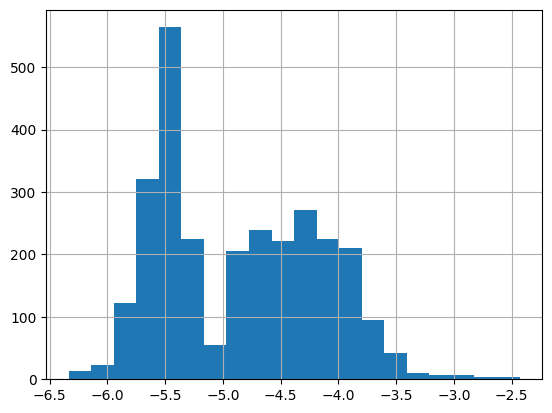

In [65]:
y.hist(bins=20)

In [66]:
# Splitting the data 80:20 for train:test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [67]:
# from sklearn.preprocessing import QuantileTransformer
# qt = QuantileTransformer(output_distribution='normal')
# y_train_trans = qt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [68]:
# from sklearn.preprocessing import PowerTransformer

# pt = PowerTransformer(method='yeo-johnson')  # works with negatives too
# y_train_trans = pt.fit_transform(y_train.values.reshape(-1, 1)).flatten()

In [69]:
# import seaborn as sns
# sns.histplot(y_train_trans, bins = 20)

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Standardizing train and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# y_scaler = StandardScaler()
# y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
# y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# 4. Model Training
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train_scaled, y_train_log)

In [72]:
pd.DataFrame(X_train_scaled, columns=X_test.columns).describe()

,VSA_EState10,fr_C_S,SMR_VSA6_x,SMR_VSA10,Kappa1,FractionCSP3,SlogP_VSA12,GATS1Z,GATS1are,FCSP3,...,PEOE_VSA2_x,dipole_moment_D,homo_eV,lumo_eV,homo_lumo_gap_eV,polarizability_ang3,min_partial_charge,max_partial_charge,min_abs_partial_charge,max_abs_partial_charge
count,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,...,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03,2.292000e+03
mean,3.022597e-17,-6.200198e-18,-2.379326e-16,1.240040e-17,-8.680278e-17,1.240040e-16,-1.317542e-17,4.464143e-16,-1.271041e-16,1.240040e-16,...,-3.875124e-17,5.223667e-16,1.892611e-15,-2.480079e-17,1.329943e-15,5.859187e-16,5.494926e-16,-6.045193e-17,-3.100099e-17,-4.650149e-16
std,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,...,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,-8.572576e-02,-5.534851e-02,-2.019775e+00,-2.805482e-01,-2.868235e+00,-4.973683e+00,-9.724679e-02,-3.526493e+00,-2.096155e+00,-4.973683e+00,...,-6.751776e-01,-1.945579e+00,-4.365191e+00,-8.427642e+00,-3.409245e+00,-2.945868e+00,-6.730223e+00,-1.198731e+00,-1.223443e+00,-2.840699e+00
25%,-8.572576e-02,-5.534851e-02,-5.842062e-01,-2.805482e-01,-6.830022e-01,4.910076e-01,-9.724679e-02,-6.508227e-01,-8.520289e-01,4.910076e-01,...,-6.751776e-01,-7.865186e-01,-3.827179e-01,-4.621748e-01,-5.883484e-01,-6.528627e-01,-4.815586e-01,-5.114056e-01,-8.180979e-01,-6.201232e-01
50%,-8.572576e-02,-5.534851e-02,1.301874e-01,-2.805482e-01,1.486205e-01,4.910076e-01,-9.724679e-02,2.463759e-01,1.412619e-01,4.910076e-01,...,-6.751776e-01,-1.195654e-01,2.094110e-01,1.353349e-01,-1.268361e-01,1.566361e-01,-4.327222e-02,-9.778925e-02,-2.558446e-01,1.292882e-03
75%,-8.572576e-02,-5.534851e-02,8.513624e-01,-2.805482e-01,6.105940e-01,4.910076e-01,-9.724679e-02,6.982756e-01,6.057642e-01,4.910076e-01,...,1.206033e+00,4.999843e-01,6.244784e-01,6.237782e-01,3.422932e-01,7.410336e-01,6.231966e-01,9.335019e-02,5.807063e-01,4.094063e-01
max,1.395682e+01,1.806733e+01,3.955646e+00,8.042234e+00,1.767732e+00,4.910076e-01,1.114007e+01,2.229885e+00,3.280166e+00,4.910076e-01,...,4.732390e+00,5.009750e+00,2.633501e+00,2.436961e+00,4.632194e+00,2.012599e+00,3.004626e+00,7.630082e+00,3.004252e+00,7.933550e+00


In [73]:
X_train_scaled.shape
X_train_scaled[:4]

array([[-0.08572576, -0.05534851, -1.2985999 ,  2.6122706 , -1.87847392,
        -3.15211946, -0.09724679, -1.75486022, -0.13466245, -3.15211946,
        -1.79504423,  2.48228755,  0.04340109,  0.54836329, -0.02955271,
         1.4907166 ,  1.23155691,  1.40570383,  2.76378125,  2.53779687,
         1.81403001,  1.21491113,  2.22941294, -0.22723679, -0.47754798,
        -0.366384  , -1.26966389,  1.05780543,  3.03274562,  0.56111774,
         2.76069673,  3.58611965,  0.        ,  0.        , -0.07254763,
        -0.26163612, -0.67517759, -0.94671397, -4.00865145, -0.59515601,
         3.83838797, -2.71321176,  0.27766226,  1.22828266, -0.03660709,
        -0.35931435],
       [-0.08572576, -0.05534851, -0.59098756, -0.28054816,  0.08152499,
         0.49100759, -0.09724679, -1.3362613 , -1.29315798,  0.49100759,
        -0.60233764,  0.17373627,  1.17395656, -0.0314796 , -0.02955271,
         0.33219749, -0.05531734, -0.06197771,  1.61507687,  1.05984309,
        -0.75961048,  1.47070

In [74]:
X_train.shape
X_train.values

array([[0.00000000e+00, 0.00000000e+00, 6.60688196e+00, ...,
        7.48693000e-01, 6.04120000e-02, 7.63508000e-01],
       [0.00000000e+00, 0.00000000e+00, 1.30895128e+01, ...,
        4.63777000e-01, 1.61635000e-01, 6.21967000e-01],
       [0.00000000e+00, 0.00000000e+00, 2.02614359e+01, ...,
        3.97155000e-01, 8.33100000e-03, 8.12108000e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 7.10979754e+00, ...,
        2.08588000e-01, 1.18196000e-01, 5.14123000e-01],
       [0.00000000e+00, 0.00000000e+00, 1.96342692e+01, ...,
        2.22054000e-01, 2.66850000e-02, 9.87721000e-01],
       [0.00000000e+00, 0.00000000e+00, 1.97585203e+01, ...,
        3.49525000e-01, 3.35480000e-02, 8.89767000e-01]], shape=(2292, 46))

In [75]:
len(X_train)
len(X_test)

573

In [76]:
df_train = pd.DataFrame(X_train_scaled, columns=[f'feat_{i}' for i in range(X_train_scaled.shape[1])])
df_train['target'] = y_train.values

In [77]:
# import smogn

# # Apply SMOGN
# df_smogn = smogn.smoter(
#     data=df_train,
#     y='target',
#     k=5,                   # k-nearest neighbors
#     samp_method='extreme', # best for oversampling tails (not 'balance')
#     rel_thres=0.8,         # anything above 0.8 will be considered "rare"
#     rel_method='auto',     # auto = SMOGN infers from distribution shape
#     under_samp=True,       # optional: downsample high-density areas
#     rel_coef=0.9           # more aggressive weighting of rare samples (optional)
# )

In [78]:
# X_bal = df_smogn.drop(columns='target').values
# y_bal = df_smogn['target'].values

In [79]:
# !pip install optuna
# !pip install catboost

In [80]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import mean_squared_error


# Hyper parameter tuning with optuna
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 200, 1000),
        'depth': trial.suggest_int('depth', 4, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 0.1, 10.0, log=True),
        'random_seed': 42,
        'task_type': 'GPU',
        'verbose': 0
    }
    
    # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # mse_scores = []

    # for train_idx, val_idx in kf.split(X_bal):
    #     X_tr, X_val = X_bal[train_idx], X_bal[val_idx]
    #     y_tr, y_val = y_bal[train_idx], y_bal[val_idx]

    #     model = CatBoostRegressor(**params)
    #     model.fit(X_tr, y_tr, eval_set=(X_val, y_val), early_stopping_rounds=50)

    #     preds = model.predict(X_val)
    #     mse = mean_squared_error(y_val, preds)
    #     mse_scores.append(mse)

    # return np.mean(mse_scores)

    # kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # mse_scores = []

    # for train_idx, val_idx in kf.split(X_train_scaled):
    #     X_tr, X_val = X_train_scaled[train_idx], X_train_scaled[val_idx]
    #     y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    #     try:
    #         y_bins = pd.qcut(y_tr, q=5, labels=False, duplicates='drop')
    #     except ValueError:
    #         y_bins = pd.cut(y_tr, bins=5, labels=False)

    #     sample_weights = compute_sample_weight(class_weight='balanced', y=y_bins)

    #     model = CatBoostRegressor(**params)
    #     model.fit(X_tr, y_tr, sample_weight=sample_weights, eval_set=(X_val, y_val), early_stopping_rounds=50)

    #     preds = model.predict(X_val)
    #     mse = mean_squared_error(y_val, preds)
    #     mse_scores.append(mse)

    # return np.mean(mse_scores)

    model = CatBoostRegressor(**params)
    
    # Cross Validation
    score = cross_val_score(model, X_train_scaled, y_train, 
                            scoring='neg_mean_squared_error', 
                            cv=5, error_score='raise')
    
    return -1 * np.mean(score)

In [81]:
# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # e.g. run for 30 minutes

# Compute weights from full training set
# y_bins_full = pd.qcut(y_train, q=5, labels=False, duplicates='drop')
# sample_weights_full = compute_sample_weight(class_weight='balanced', y=y_bins_full)
best_params = study.best_params
# Train final model using the best parameters + weights
best_model = CatBoostRegressor(**best_params, task_type='GPU', random_seed=42, verbose=100)
# best_model.fit(X_train_scaled, y_train, sample_weight=sample_weights_full)
# best_model.fit(X_train_scaled, y_train)
# best_model.fit(X_bal, y_bal)
best_model.fit(X_train_scaled, y_train) #Fitting the model

# # Best model
# best_params = study.best_params
# best_model = CatBoostRegressor(**best_params, task_type='GPU', random_seed=42, verbose=0)
# best_model.fit(X_train_scaled, y_train)

[I 2025-07-28 12:36:59,012] A new study created in memory with name: no-name-02f51f24-5ae0-45d1-8b81-ad028786fda9
[I 2025-07-28 12:39:19,155] Trial 0 finished with value: 0.2250381440000106 and parameters: {'iterations': 699, 'depth': 10, 'learning_rate': 0.24820453566770911, 'l2_leaf_reg': 1.6904720080395148}. Best is trial 0 with value: 0.2250381440000106.
[I 2025-07-28 12:39:37,977] Trial 1 finished with value: 0.2023224609102475 and parameters: {'iterations': 609, 'depth': 4, 'learning_rate': 0.04255642981090763, 'l2_leaf_reg': 4.30978117250509}. Best is trial 1 with value: 0.2023224609102475.
[I 2025-07-28 12:40:03,492] Trial 2 finished with value: 0.2024511854002617 and parameters: {'iterations': 789, 'depth': 4, 'learning_rate': 0.026234286230884515, 'l2_leaf_reg': 0.40060289614226663}. Best is trial 1 with value: 0.2023224609102475.
[I 2025-07-28 12:40:09,440] Trial 3 finished with value: 0.21420254831976812 and parameters: {'iterations': 366, 'depth': 4, 'learning_rate': 0.173

0:	learn: 0.6762574	total: 1.99ms	remaining: 875ms
100:	learn: 0.4240694	total: 159ms	remaining: 532ms
200:	learn: 0.3925763	total: 321ms	remaining: 381ms
300:	learn: 0.3660562	total: 482ms	remaining: 223ms
400:	learn: 0.3451073	total: 646ms	remaining: 62.9ms
439:	learn: 0.3375337	total: 709ms	remaining: 0us


In [ ]:
best_model.save_model("catboost_model_ea_dft.cbm") #Saving the best model to disk

In [82]:
# Load from file
# best_model = CatBoostRegressor()
# best_model.load_model("catboost_model_ea.cbm")

In [83]:
import catboost
catboost.__version__

'1.2.8'

In [84]:

# 5. Evaluation
# y_pred_log = model.predict(X_test_scaled)
# ------------------- Step 5: Predict and Inverse Transform ------------------- #
# y_pred_orig = model.predict(X_test_scaled)
y_pred_orig = best_model.predict(X_test_scaled)
y_pred_train = best_model.predict(X_train_scaled)
# y_bal_train = best_model.predict(X_bal)
# y_pred_orig = pt.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()
# y_pred_train = pt.inverse_transform(y_pred_train_trans.reshape(-1, 1)).flatten()
# y_pred_orig = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
# Inverse log1p
# y_pred = np.expm1(y_pred_log)
# y_test = np.expm1(y_test)


In [86]:

# Calculating errors
from sklearn.metrics import mean_squared_error, r2_score

# rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_orig))
r2 = r2_score(y_test, y_pred_orig)
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

RMSE: 0.4640
R² Score: 0.5435


In [87]:
feature_names = X.columns.tolist()  # This should match the model's input

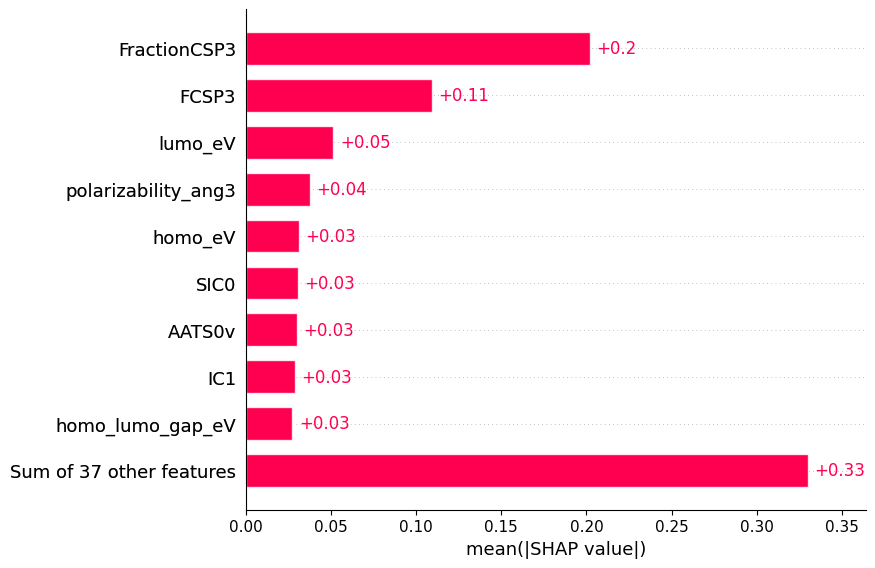

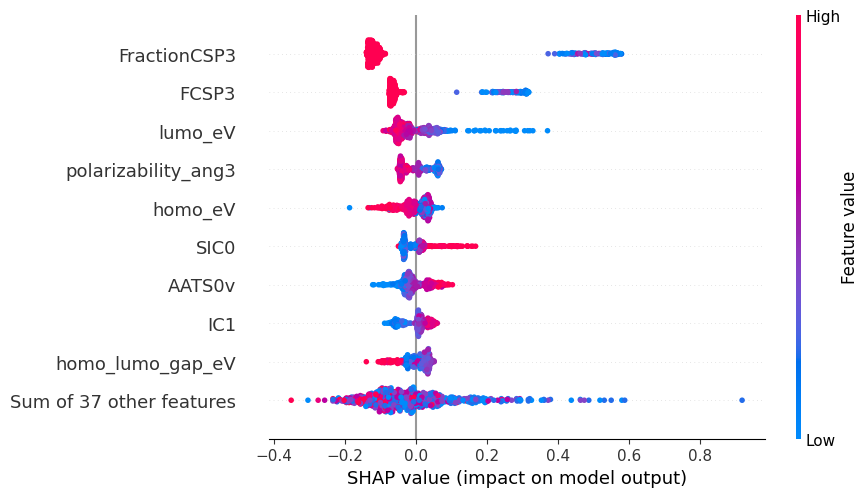

In [88]:
# Shap Diagrams
import shap

explainer = shap.Explainer(best_model, X_test_scaled, feature_names=X.columns)
shap_values = explainer(X_test_scaled)

shap.plots.bar(shap_values, max_display=10)
shap.plots.beeswarm(shap_values, max_display=10)

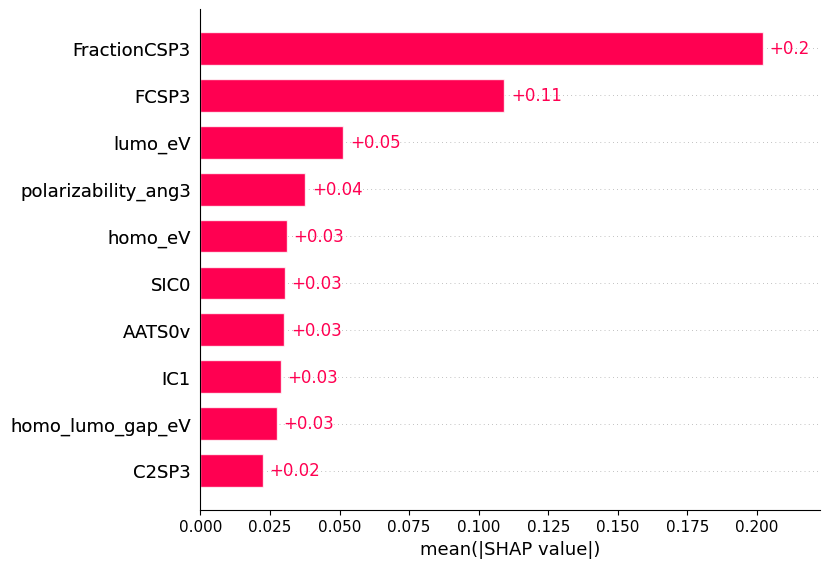

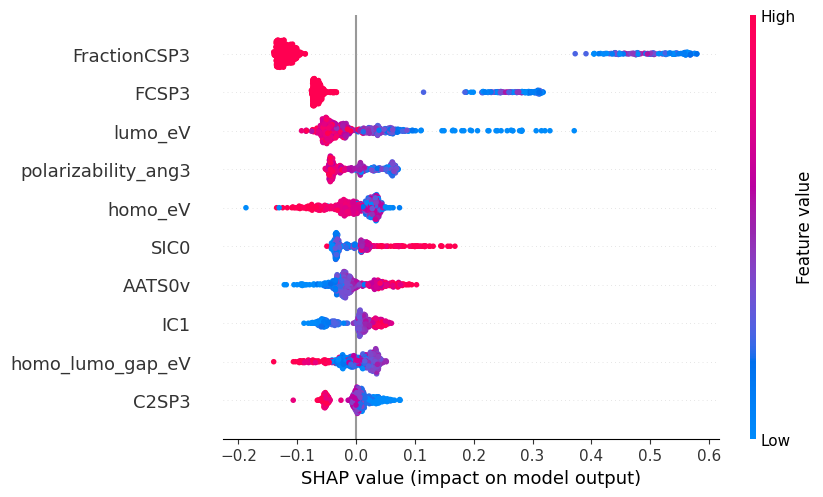

In [89]:
# Compute SHAP values
# explainer = shap.Explainer(model, X_test_scaled, feature_names=X.columns)
# shap_values = explainer(X_test_scaled)

# Get mean absolute SHAP values per feature and sort them
mean_shap = np.abs(shap_values.values).mean(axis=0)
top_10_indices = np.argsort(mean_shap)[-10:][::-1]

# Slice SHAP explanation to include only top 10 features
shap_values_top10 = shap.Explanation(
    values=shap_values.values[:, top_10_indices],
    base_values=shap_values.base_values,
    data=shap_values.data[:, top_10_indices],
    feature_names=np.array(shap_values.feature_names)[top_10_indices].tolist()
)

# Plot only top 10 features
shap.plots.bar(shap_values_top10)
shap.plots.beeswarm(shap_values_top10)

In [90]:
# df["FractionCSP3"].value_counts()

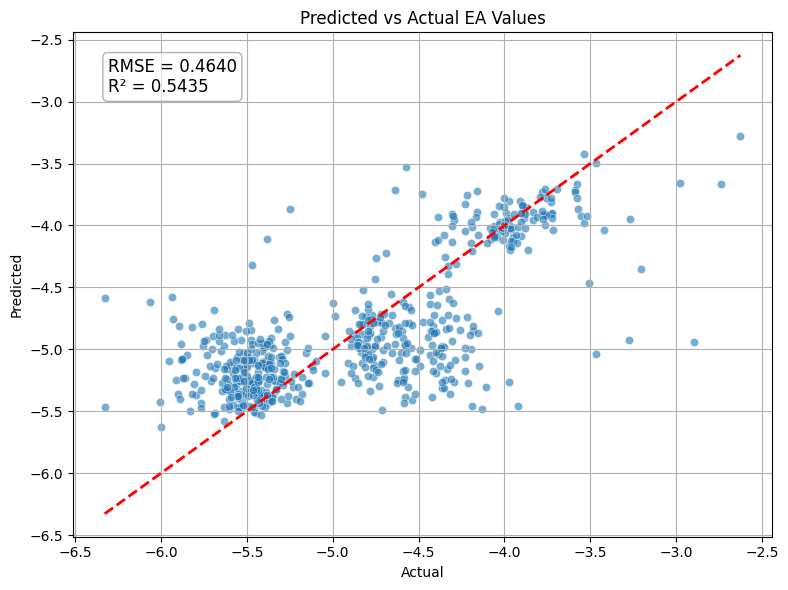

In [91]:
residuals = y_test - y_pred_orig

import matplotlib.pyplot as plt
import seaborn as sns 

# --- A. Predicted vs Actual Plot ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_orig, alpha=0.6)

# Reference line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', linewidth=2)

# Annotate RMSE and R² inside the plot
plt.text(
    0.05, 0.95,
    f"RMSE = {rmse:.4f}\nR² = {r2:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.6)
)

plt.title("Predicted vs Actual EA Values")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

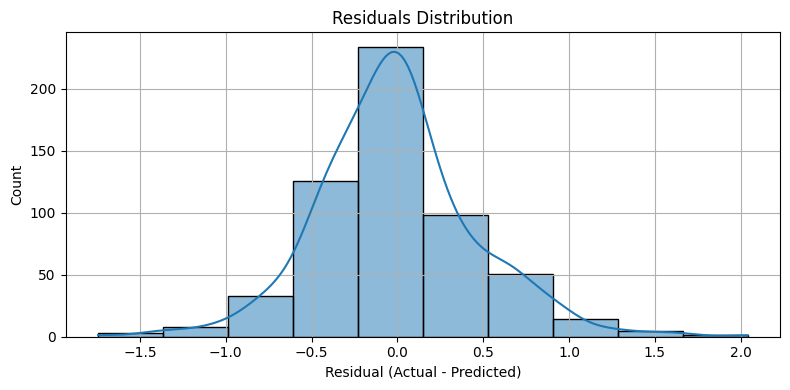

In [92]:
# --- B. Histogram of Residuals ---
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=10)
plt.title("Residuals Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

In [98]:
# Save the model to a JSON file
best_model.save_model("cgb_ea_model.json")

C:\Users\nandi\AppData\Local\Temp\ipykernel_10476\3234612493.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


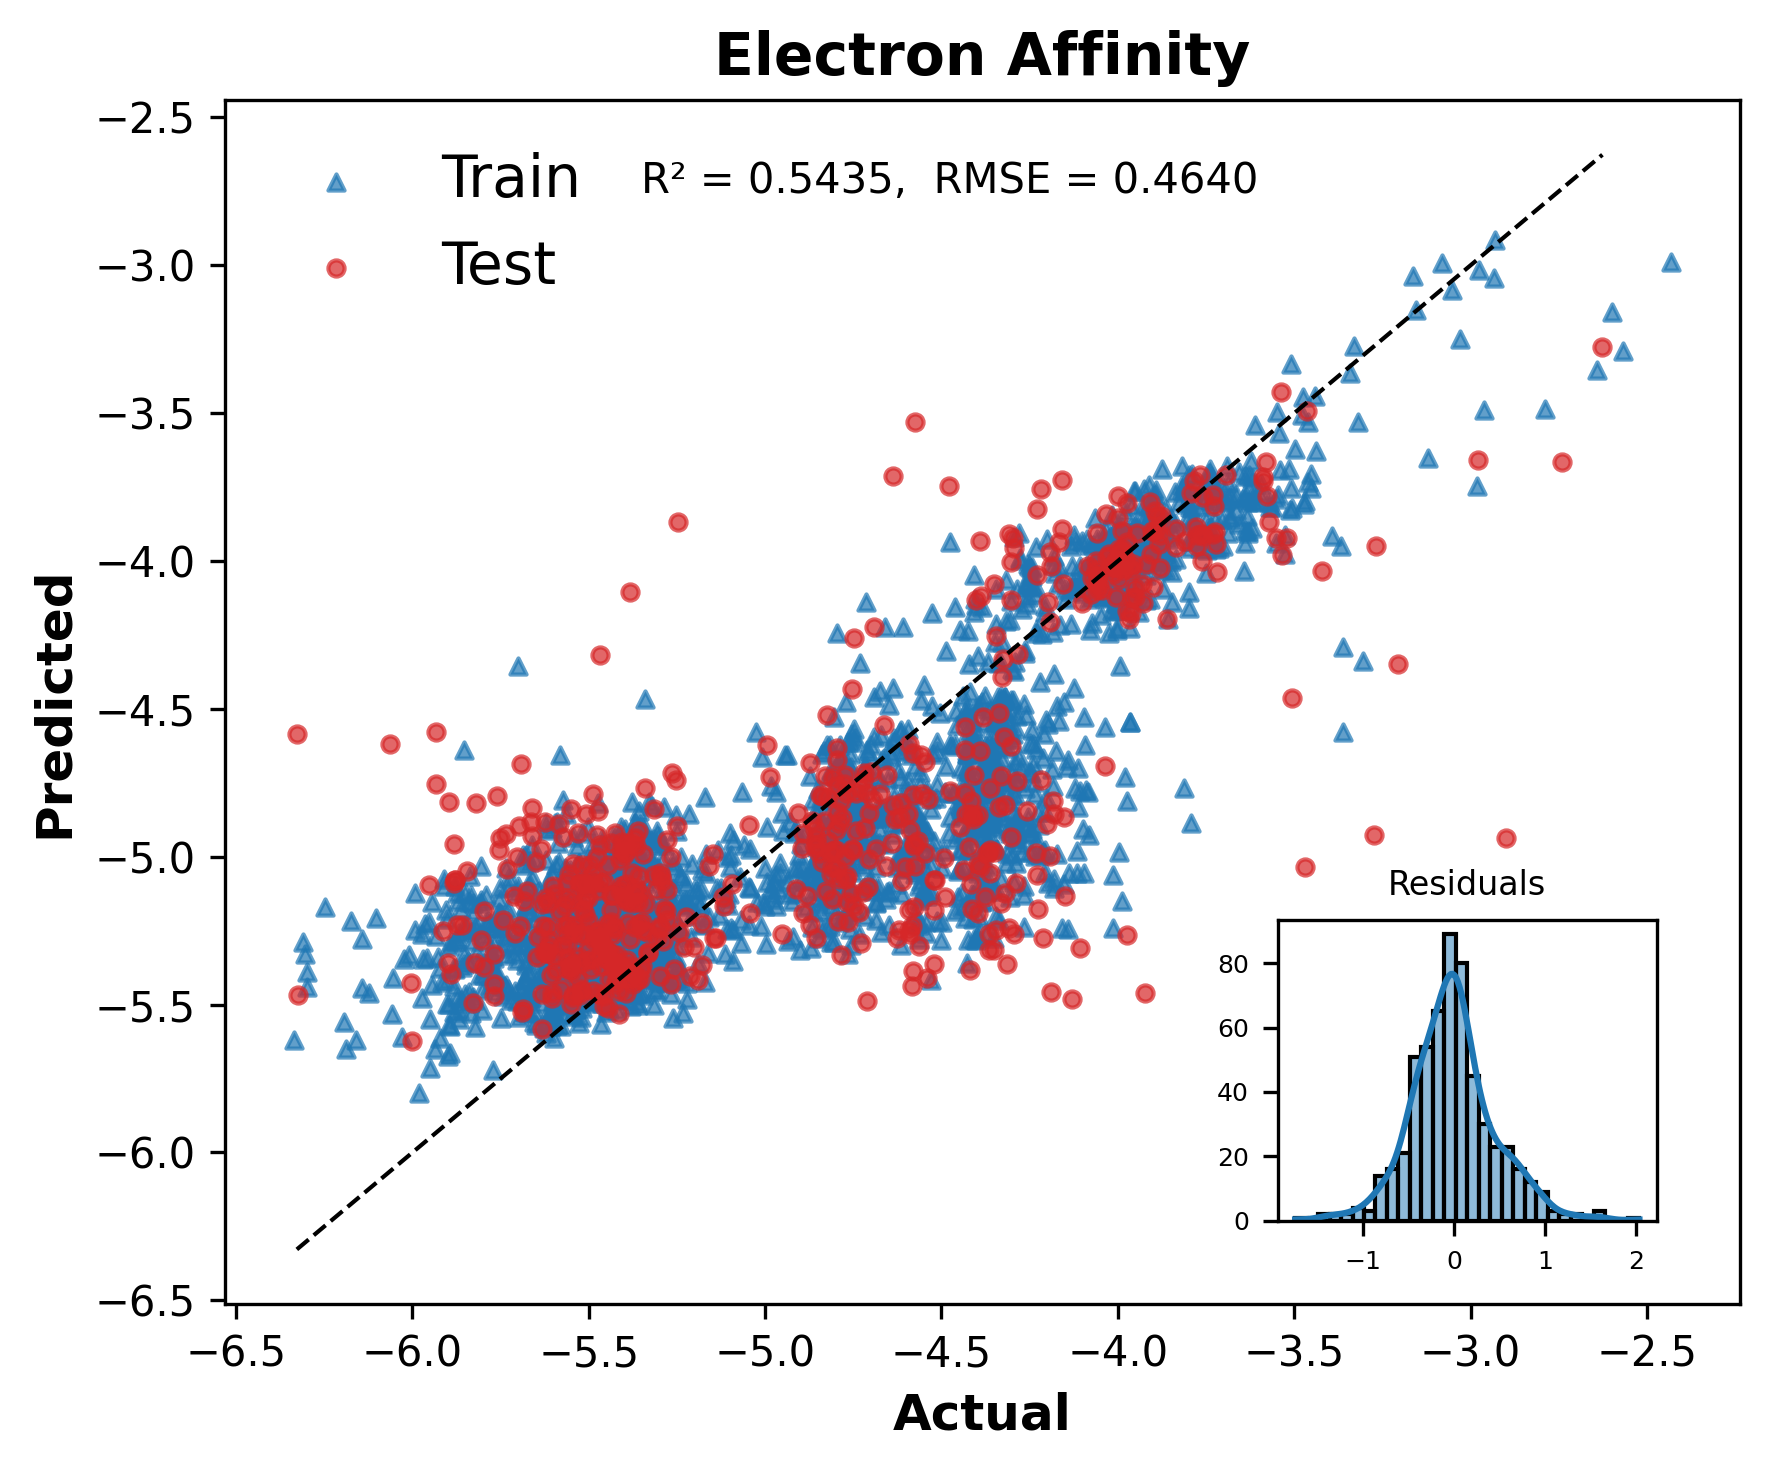

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# ➤ Create main plot with better layout engine
fig, ax = plt.subplots(figsize=(6, 5), dpi=300)

# ➤ Scatter: Train and Test
ax.scatter(y_train, y_pred_train, alpha=0.7, s=15, color='tab:blue', marker='^', label='Train')
# ax.scatter(y_bal, y_bal_train, alpha=0.7, s=15, color='tab:blue', marker='^', label='Train')
ax.scatter(y_test, y_pred_orig, alpha=0.7, s=15, color='tab:red', marker='o', label='Test')

# ➤ Diagonal reference line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=1)

# ➤ Title and axes labels
ax.set_title("Electron Affinity", fontsize=14, fontweight='bold')
ax.set_xlabel("Actual", fontsize=12, fontweight='bold')
ax.set_ylabel("Predicted", fontsize=12, fontweight='bold')
ax.tick_params(axis='both', labelsize=10)

# ➤ Custom legend with performance metrics
# ax.legend(title=f"RMSE = {rmse:.4f}\nR² = {r2:.4f}", loc='upper left', fontsize=10, title_fontsize=10, frameon=False)

x_center = (y_test.min() + y_test.max()) / 2
# y_top = y_pred_orig.max() + (y_pred_orig.max() - y_pred_orig.min()) * 0.15
y_top = ax.get_ylim()[1] - 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0])
ax.text(x_center, y_top, f"R² = {r2:.4f},  RMSE = {rmse:.4f}",
        fontsize=10, ha='center', va='top')

# ➤ Legend
ax.legend(loc='upper left', fontsize=14, frameon=False)
# ➤ Inset residual plot
inset_ax = inset_axes(ax, width="25%", height="25%", loc='lower right', borderpad=2)
sns.histplot(residuals, bins=30, kde=True, ax=inset_ax)
inset_ax.set_title("Residuals", fontsize=8)
inset_ax.set_xlabel("")
inset_ax.set_ylabel("")
inset_ax.tick_params(labelsize=6)

# ➤ Save and display
plt.tight_layout()
plt.savefig("predicted_vs_actual_with_train_test.png", dpi=300, bbox_inches='tight')
plt.show()
